In [2]:
# 1. 기본 라이브러리 불러오기
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [3]:
# 2. 일반화 된 유사 연산자 함수 정의하기
def ImageConv(inp,mask):
    n = mask.shape[0]
    k = np.uint8((n-1)/2)
    h,w = inp.shape
    
    inp_pad = np.zeros((h+2*k, w+2*k))
    inp_pad[k:h+k,k:w+k] = inp
    
    out = np.zeros((h+2*k, w+2*k))
    for i in range(k,h+k):
        for j in range(k,w+k):
            temp = inp_pad[i-k:i+k+1,j-k:j+k+1]
            for x in range(0,n):
                for y in range(0,n):
                    out[i,j] += temp[x,y]*mask[x,y]
    out = out[k:h+k,k:w+k]
    return out

In [34]:
# define user parameters
threshold1 = 20
threshold2 = 50

In [5]:
# 3. ‘chip.jpg’를 흑백영상(inp)으로 불러오고, 유사 연산자에 적용하기(out)
inp = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)
h,w = inp.shape

In [19]:
# 4. 행(row), 열(column) 마스크 생성하기 (r_mask, c_mask)
r_mask = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
c_mask = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

# r_mask = c_mask.transpose()
print(r_mask)
print(c_mask)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [20]:
# 5. 각 마스크에 대한 컨볼루션 수행하기(Hr, Hc)
Hr = ImageConv(inp, r_mask)
Hc = ImageConv(inp, c_mask)
print(Hr)
print(Hc)

[[ 503.  669.  671. ...  670.  696.  498.]
 [   0.   -3.   -5. ...  -87. -166. -155.]
 [ -10.  -10.   -9. ... -314. -424. -316.]
 ...
 [  -9.   -9.   -5. ...  104.  115.   70.]
 [ -12.  -11.  -15. ...   87.   76.   50.]
 [-173. -239. -247. ... -378. -426. -332.]]
[[-503.    3.   -7. ... -116.   50.  536.]
 [-668.    5.   -9. ... -113.  100.  673.]
 [-664.    4.   -7. ...   32.  144.  510.]
 ...
 [-247.  -17.  -15. ...  -94.  -83.  382.]
 [-244.  -21.  -11. ... -113.  -64.  434.]
 [-183.  -17.   -3. ...  -78.  -40.  342.]]


In [21]:
# 6. 크기(gradient)를 계산하기(H)
H = np.sqrt(Hr**2 + Hc**2)
print(np.max(H))

877.0279357010243


In [39]:
# 7. 6번에서 구한 H에 임계값을 적용하기
out1 = np.zeros((h,w))
out2 = np.zeros((h,w))

out1[np.where(H>threshold1)] = 1
out2[np.where(H>threshold2)] = 1

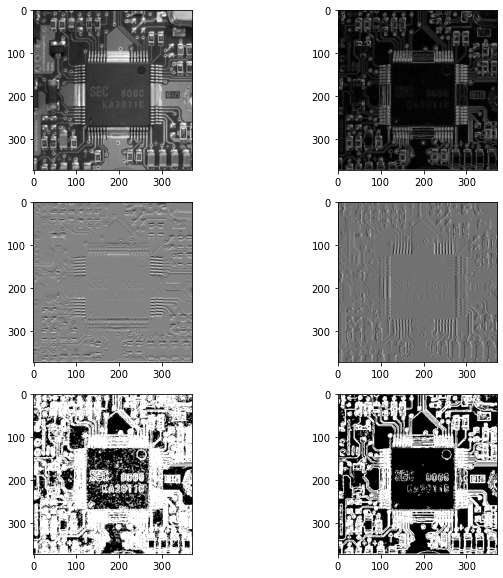

In [44]:
# 8. 전체 결과 출력하기
plt.figure(figsize=(10,10))
plt.subplot(3,2,1); plt.imshow(inp, cmap='gray')
plt.subplot(3,2,2); plt.imshow(H, cmap='gray') # 0~??? Hr**2 + Hc**2
plt.subplot(3,2,3); plt.imshow(Hr, cmap='gray') # -??? ~ ???
plt.subplot(3,2,4); plt.imshow(Hc, cmap='gray')
plt.subplot(3,2,5); plt.imshow(out1, cmap='gray')
plt.subplot(3,2,6); plt.imshow(out2, cmap='gray')